<a href="https://colab.research.google.com/github/niharmalkar/CustomerSegmentationwithK_MeansClustering/blob/main/CustomerSegmentationwithK_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Load the Dataset

In [1]:
import pandas as pd

# Load the dataset with ISO-8859-1 encoding
df = pd.read_csv('/content/onlineRetail.csv', encoding='ISO-8859-1')  # Update the path to your dataset

# Display the first few rows to check the data
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  


## Step 2: Data Cleaning

In [2]:
# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True)  # Handle inconsistent date formats

# Ensure CustomerID is treated as a string
df['CustomerID'] = df['CustomerID'].astype(str)

# Display the cleaned data
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom  


## Step 3: Feature Engineering

In [3]:
# Calculate TotalPrice for each transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Aggregate data by CustomerID
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',       # Number of unique purchases
    'TotalPrice': 'sum',          # Total spending
    'InvoiceDate': ['min', 'max'] # First and last purchase date
}).reset_index()

# Rename columns
customer_df.columns = ['CustomerID', 'PurchaseCount', 'TotalSpending', 'FirstPurchaseDate', 'LastPurchaseDate']

# Calculate Recency, Frequency, and Monetary values
customer_df['Recency'] = (customer_df['LastPurchaseDate'].max() - customer_df['LastPurchaseDate']).dt.days
customer_df['Frequency'] = customer_df['PurchaseCount']
customer_df['Monetary'] = customer_df['TotalSpending']

# Display the engineered features
print(customer_df.head())


  CustomerID  PurchaseCount  TotalSpending   FirstPurchaseDate  \
0    12346.0              2           0.00 2011-01-18 10:01:00   
1    12347.0              6        4085.18 2010-12-07 14:57:00   
2    12348.0              4        1797.24 2010-12-16 19:09:00   
3    12350.0              1         334.40 2011-02-02 16:01:00   
4    12352.0             10        1233.68 2011-02-16 12:33:00   

     LastPurchaseDate  Recency  Frequency  Monetary  
0 2011-01-18 10:17:00      286          2      0.00  
1 2011-10-31 12:25:00        0          6   4085.18  
2 2011-09-25 13:13:00       36          4   1797.24  
3 2011-02-02 16:01:00      271          1    334.40  
4 2011-09-28 14:58:00       33         10   1233.68  


## Step 4: Select Relevant Features for Clustering

In [4]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = customer_df[['Recency', 'Frequency', 'Monetary']]

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display the scaled features
print(scaled_features[:5])


[[ 2.04404203 -0.31295983 -0.23006719]
 [-0.98503902  0.1808534   0.32205783]
 [-0.60375609 -0.06605322  0.01283549]
 [ 1.88517415 -0.43641314 -0.18487197]
 [-0.63552967  0.67466663 -0.06333143]]


## Step 5: Determine the Optimal Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

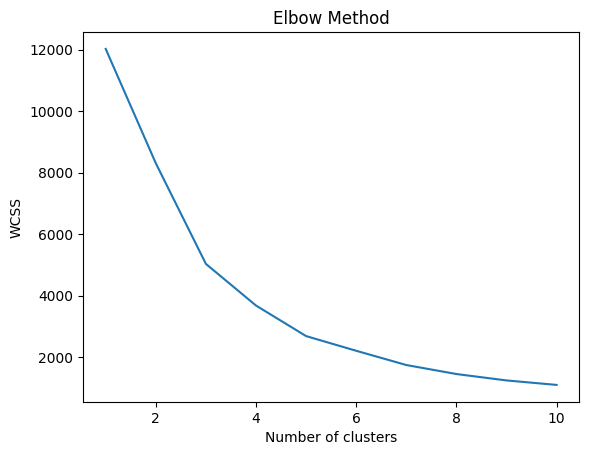

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


## Step 6: Apply K-Means Clustering

In [11]:
# Optimal number of clusters based on the elbow plot
optimal_clusters = 10  # Update this based on the elbow plot

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Display the customer data with cluster labels
print(customer_df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  CustomerID  PurchaseCount  TotalSpending   FirstPurchaseDate  \
0    12346.0              2           0.00 2011-01-18 10:01:00   
1    12347.0              6        4085.18 2010-12-07 14:57:00   
2    12348.0              4        1797.24 2010-12-16 19:09:00   
3    12350.0              1         334.40 2011-02-02 16:01:00   
4    12352.0             10        1233.68 2011-02-16 12:33:00   

     LastPurchaseDate  Recency  Frequency  Monetary  Cluster  HC_Cluster  
0 2011-01-18 10:17:00      286          2      0.00        1           2  
1 2011-10-31 12:25:00        0          6   4085.18        8           0  
2 2011-09-25 13:13:00       36          4   1797.24        0           0  
3 2011-02-02 16:01:00      271          1    334.40        1           2  
4 2011-09-28 14:58:00       33         10   1233.68        8           0  


## Step 7: Visualize the Clusters

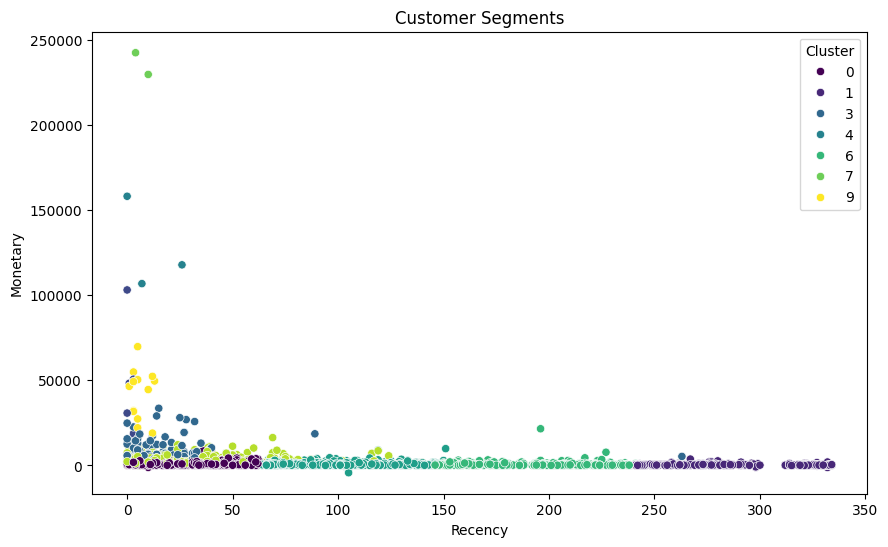

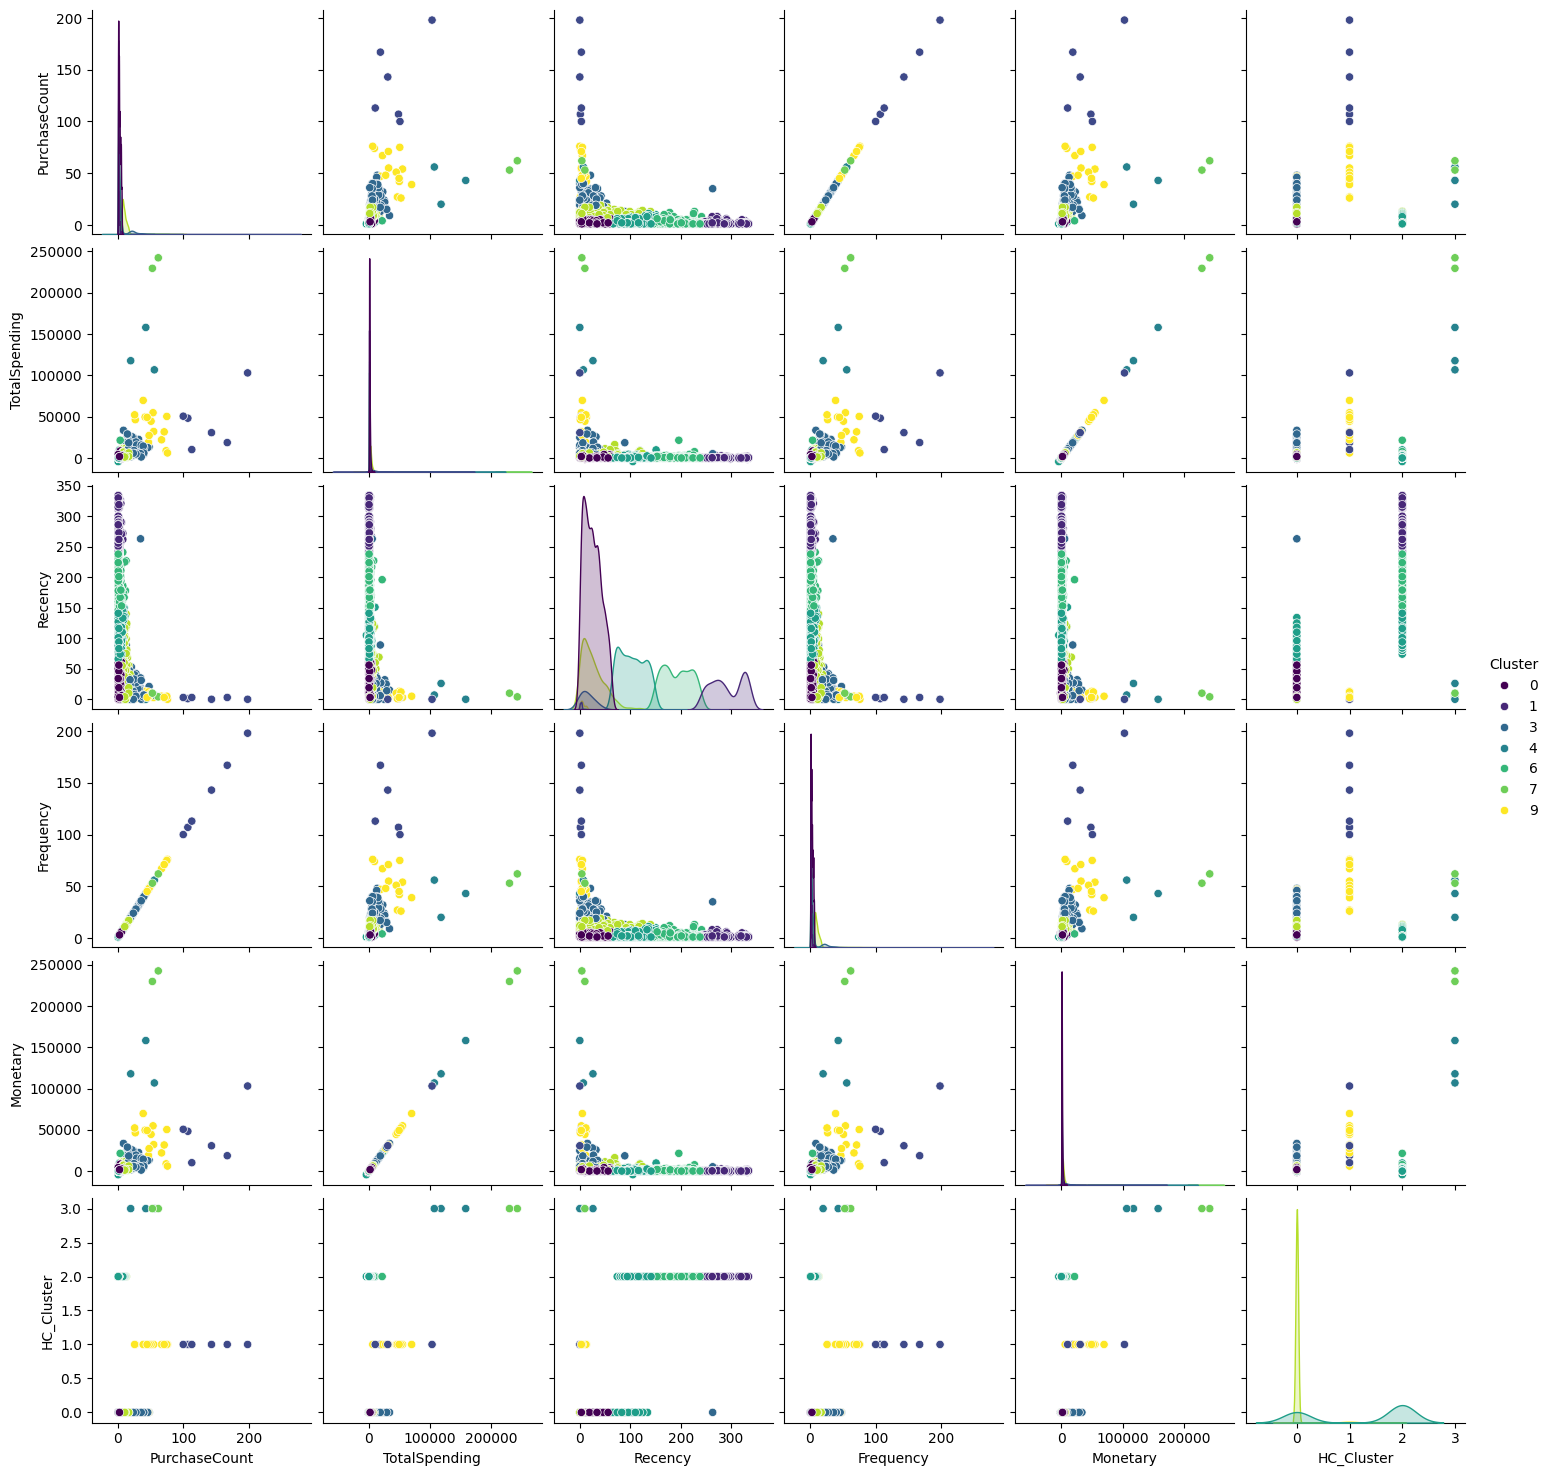

In [12]:
import seaborn as sns

# Scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=customer_df, palette='viridis')
plt.title('Customer Segments')
plt.show()

# Pair plot for a comprehensive visualization
sns.pairplot(customer_df, hue='Cluster', palette='viridis')
plt.show()


## Step 8: Analyze Cluster Characteristics

In [14]:
# Analyze cluster characteristics
cluster_analysis = customer_df.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std']
}).reset_index()

# Rename columns for better readability
cluster_analysis.columns = ['Cluster', 'Recency_Mean', 'Recency_Std', 'Frequency_Mean', 'Frequency_Std', 'Monetary_Mean', 'Monetary_Std']

# Display the cluster analysis
print(cluster_analysis)


   Cluster  Recency_Mean  Recency_Std  Frequency_Mean  Frequency_Std  \
0        0     25.084453    16.907916        2.741523       1.584087   
1        1    290.834091    31.257943        1.411364       0.971746   
2        2      1.666667     1.505545      138.000000      38.719504   
3        3     16.890756    26.689295       24.588235       7.304992   
4        4     11.000000    13.453624       39.666667      18.230012   
5        5    103.084469    24.838764        2.663488       1.772105   
6        6    192.037099    27.367469        1.900506       1.430324   
7        7      7.000000     4.242641       57.500000       6.363961   
8        8     26.207865    23.348808       10.127341       2.966777   
9        9      5.400000     4.289522       53.133333      16.539419   

   Monetary_Mean  Monetary_Std  
0     894.963572    872.550566  
1     313.480568    397.175436  
2   43607.588333  33178.672847  
3    9320.503697   6150.325432  
4  127553.980000  27007.912790  
5     720

## Step 9: Customer Segmentation Reports

Cluster 1 Report
       PurchaseCount  TotalSpending              FirstPurchaseDate  \
count     440.000000     440.000000                            440   
mean        1.411364     313.480568  2011-01-07 18:47:05.181818112   
min         1.000000   -1192.200000            2010-12-01 09:09:00   
25%         1.000000     127.665000            2010-12-08 11:45:45   
50%         1.000000     221.945000            2011-01-07 12:36:00   
75%         1.000000     374.292500            2011-02-03 21:01:30   
max         8.000000    3724.770000            2011-03-04 15:20:00   
std         0.971746     397.175436                            NaN   

                    LastPurchaseDate     Recency   Frequency     Monetary  \
count                            440  440.000000  440.000000   440.000000   
mean   2011-01-13 15:05:43.090909184  290.834091    1.411364   313.480568   
min              2010-12-01 09:53:00  241.000000    1.000000 -1192.200000   
25%              2010-12-12 11:03:45  263.00

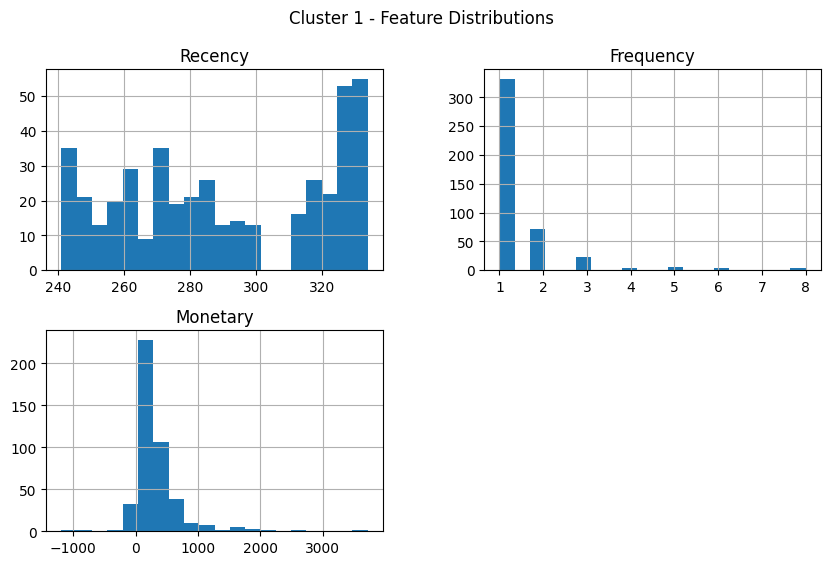

Cluster 8 Report
       PurchaseCount  TotalSpending              FirstPurchaseDate  \
count     534.000000     534.000000                            534   
mean       10.127341    3099.408352  2011-01-20 05:00:31.460674048   
min         5.000000     436.980000            2010-12-01 08:34:00   
25%         8.000000    1769.357500            2010-12-08 10:42:30   
50%         9.000000    2500.880000            2010-12-21 10:20:30   
75%        12.000000    3715.362500            2011-02-18 05:14:45   
max        19.000000   16332.460000            2011-10-10 11:12:00   
std         2.966777    2066.238643                            NaN   

                    LastPurchaseDate     Recency   Frequency      Monetary  \
count                            534  534.000000  534.000000    534.000000   
mean   2011-10-05 05:47:43.707865344   26.207865   10.127341   3099.408352   
min              2011-06-13 11:15:00    0.000000    5.000000    436.980000   
25%              2011-09-22 16:54:45    

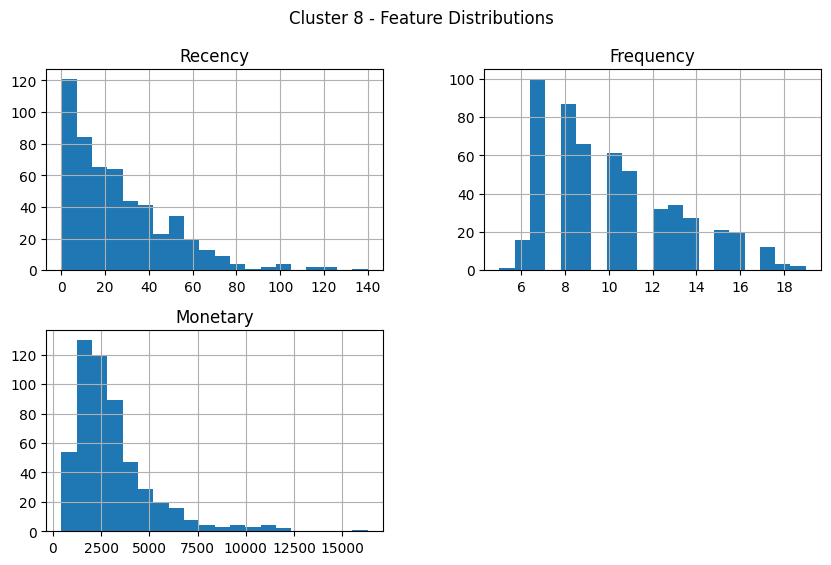

Cluster 0 Report
       PurchaseCount  TotalSpending              FirstPurchaseDate  \
count    1563.000000    1563.000000                           1563   
mean        2.741523     894.963572  2011-06-14 01:26:27.408829184   
min         1.000000   -1165.300000            2010-12-01 09:00:00   
25%         1.000000     334.085000            2011-03-07 10:10:00   
50%         2.000000     648.830000            2011-06-24 16:38:00   
75%         4.000000    1158.235000            2011-09-28 10:16:30   
max         7.000000    8516.770000            2011-10-31 15:01:00   
std         1.584087     872.550566                            NaN   

                    LastPurchaseDate      Recency    Frequency     Monetary  \
count                           1563  1563.000000  1563.000000  1563.000000   
mean   2011-10-06 09:11:13.090211328    25.084453     2.741523   894.963572   
min              2011-08-28 10:15:00     0.000000     1.000000 -1165.300000   
25%              2011-09-23 12:45:00

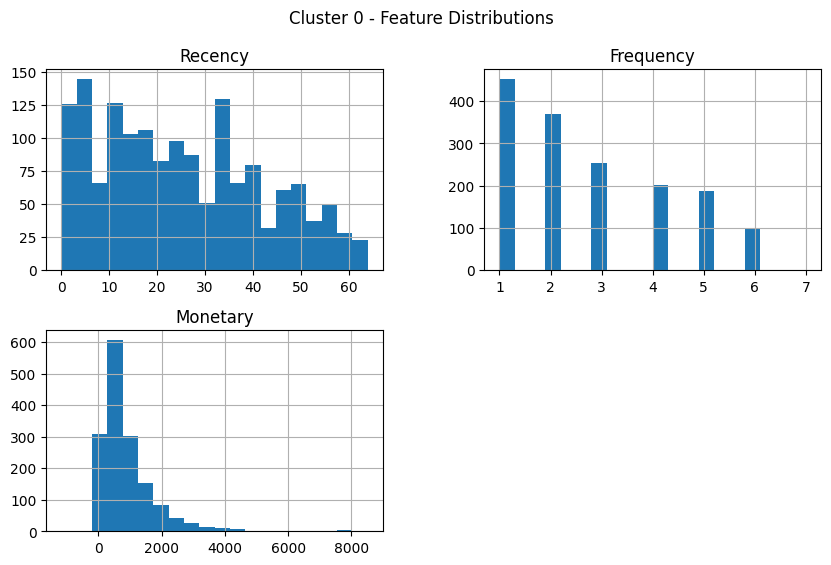

Cluster 6 Report
       PurchaseCount  TotalSpending              FirstPurchaseDate  \
count     593.000000     593.000000                            593   
mean        1.900506     529.104993  2011-03-18 10:26:30.050590464   
min         1.000000    -141.480000            2010-12-01 09:59:00   
25%         1.000000     183.600000            2011-02-15 14:02:00   
50%         1.000000     312.320000            2011-03-24 13:16:00   
75%         2.000000     590.000000            2011-04-27 12:35:00   
max        13.000000   21535.900000            2011-06-07 15:04:00   
std         1.430324    1054.760338                            NaN   

                    LastPurchaseDate     Recency   Frequency      Monetary  \
count                            593  593.000000  593.000000    593.000000   
mean   2011-04-22 09:40:35.413153792  192.037099    1.900506    529.104993   
min              2011-03-03 19:21:00  146.000000    1.000000   -141.480000   
25%              2011-03-28 15:30:00  16

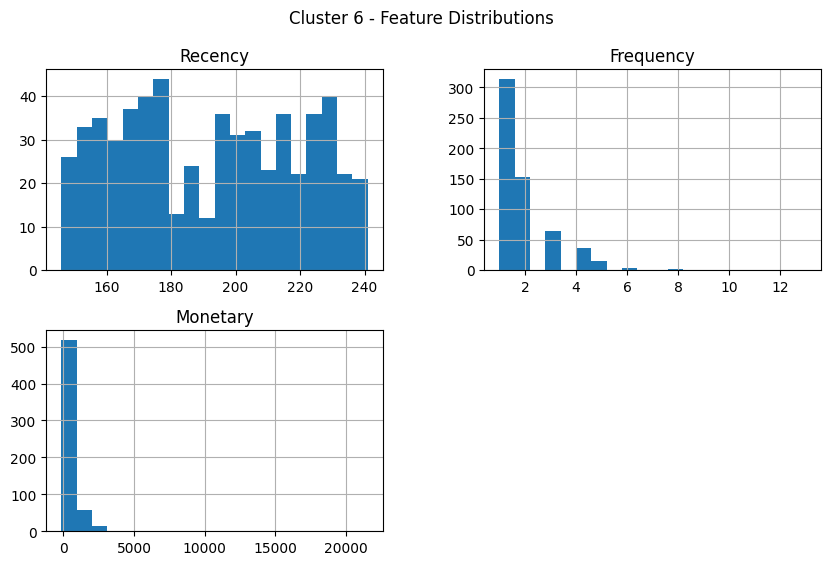

Cluster 5 Report
       PurchaseCount  TotalSpending              FirstPurchaseDate  \
count     734.000000     734.000000                            734   
mean        2.663488     720.735845  2011-04-24 05:46:21.008174336   
min         1.000000   -4287.630000            2010-12-01 10:29:00   
25%         1.000000     241.222500            2011-02-03 18:31:00   
50%         2.000000     488.465000            2011-05-10 00:39:30   
75%         4.000000     901.642500            2011-07-10 01:25:15   
max        11.000000    9861.380000            2011-08-28 16:09:00   
std         1.772105     862.091881                            NaN   

                    LastPurchaseDate     Recency   Frequency     Monetary  \
count                            734  734.000000  734.000000   734.000000   
mean   2011-07-20 08:50:45.613079040  103.084469    2.663488   720.735845   
min              2011-06-02 14:25:00   64.000000    1.000000 -4287.630000   
25%              2011-06-28 11:56:45   81.00

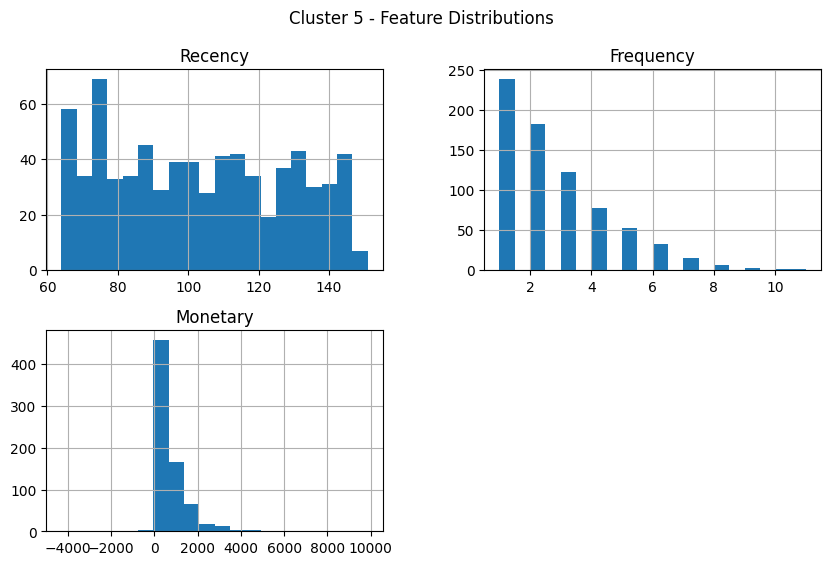

Cluster 4 Report
       PurchaseCount  TotalSpending    FirstPurchaseDate     LastPurchaseDate  \
count       3.000000        3.00000                    3                    3   
mean       39.666667   127553.98000  2010-12-15 20:34:20  2011-10-20 12:26:40   
min        20.000000   106772.32000  2010-12-02 17:08:00  2011-10-05 12:44:00   
25%        31.500000   112289.81000  2010-12-05 01:15:30  2011-10-15 01:17:30   
50%        43.000000   117807.30000  2010-12-07 09:23:00  2011-10-24 13:51:00   
75%        49.500000   137944.81000  2010-12-22 10:17:30  2011-10-28 00:18:00   
max        56.000000   158082.32000  2011-01-06 11:12:00  2011-10-31 10:45:00   
std        18.230012    27007.91279                  NaN                  NaN   

         Recency  Frequency      Monetary  Cluster  HC_Cluster  
count   3.000000   3.000000       3.00000      3.0         3.0  
mean   11.000000  39.666667  127553.98000      4.0         3.0  
min     0.000000  20.000000  106772.32000      4.0        

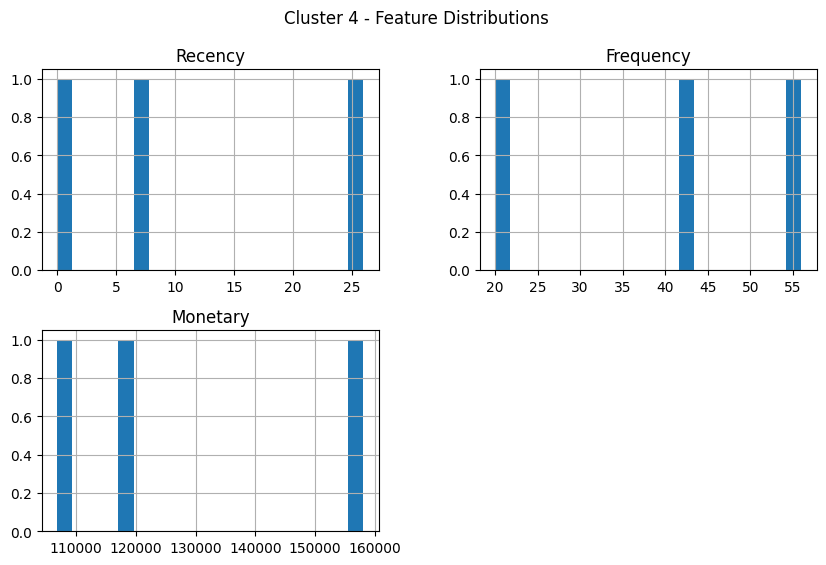

Cluster 3 Report
       PurchaseCount  TotalSpending              FirstPurchaseDate  \
count     119.000000     119.000000                            119   
mean       24.588235    9320.503697  2010-12-22 13:49:58.487394816   
min         9.000000    1269.890000            2010-12-01 08:26:00   
25%        20.000000    5244.220000            2010-12-05 11:08:30   
50%        23.000000    7170.700000            2010-12-08 11:31:00   
75%        28.000000   12087.620000            2010-12-17 08:51:00   
max        48.000000   33563.880000            2011-08-30 10:49:00   
std         7.304992    6150.325432                            NaN   

                    LastPurchaseDate     Recency   Frequency      Monetary  \
count                            119  119.000000  119.000000    119.000000   
mean   2011-10-14 12:46:18.655462144   16.890756   24.588235   9320.503697   
min              2011-02-10 14:38:00    0.000000    9.000000   1269.890000   
25%              2011-10-06 16:49:30    

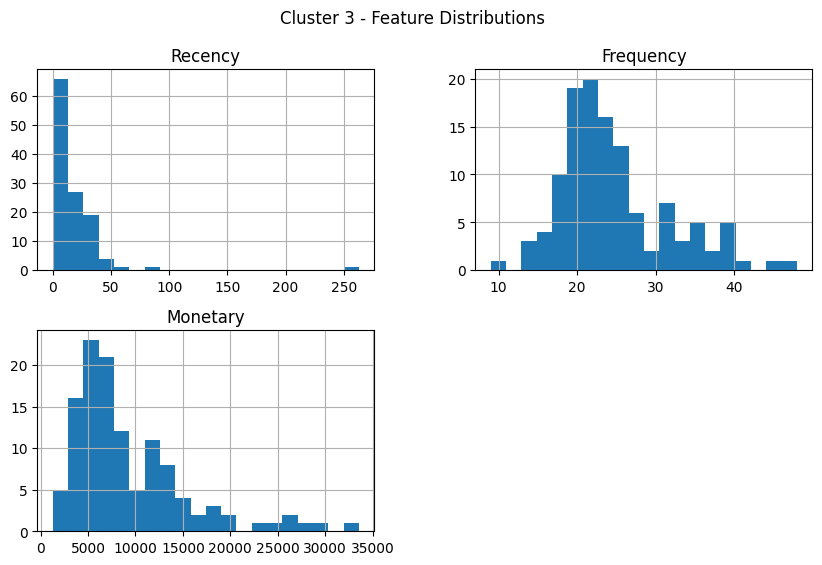

Cluster 2 Report
       PurchaseCount  TotalSpending    FirstPurchaseDate     LastPurchaseDate  \
count       6.000000       6.000000                    6                    6   
mean      138.000000   43607.588333  2010-12-02 05:04:40  2011-10-29 21:28:30   
min       100.000000   10245.450000  2010-12-01 09:41:00  2011-10-28 12:50:00   
25%       108.500000   21716.285000  2010-12-01 13:07:15  2011-10-28 13:13:30   
50%       128.000000   39494.265000  2010-12-01 14:17:30  2011-10-29 14:14:00   
75%       161.000000   50044.480000  2010-12-01 16:20:15  2011-10-31 06:46:45   
max       198.000000  103060.040000  2010-12-05 10:27:00  2011-10-31 14:22:00   
std        38.719504   33178.672847                  NaN                  NaN   

        Recency   Frequency       Monetary  Cluster  HC_Cluster  
count  6.000000    6.000000       6.000000      6.0         6.0  
mean   1.666667  138.000000   43607.588333      2.0         1.0  
min    0.000000  100.000000   10245.450000      2.0    

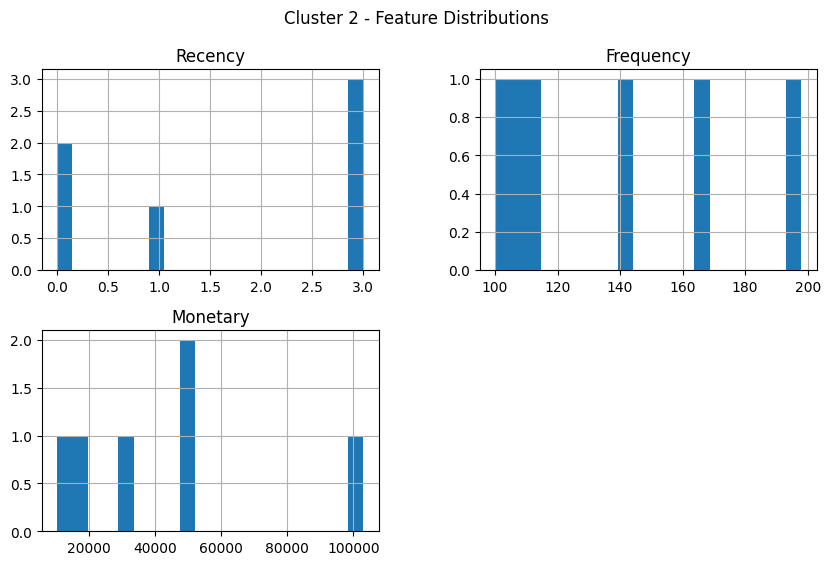

Cluster 9 Report
       PurchaseCount  TotalSpending    FirstPurchaseDate     LastPurchaseDate  \
count      15.000000      15.000000                   15                   15   
mean       53.133333   37621.520667  2010-12-04 15:01:36  2011-10-26 01:25:20   
min        26.000000    6152.710000  2010-12-01 09:41:00  2011-10-18 12:17:00   
25%        43.500000   24699.870000  2010-12-01 11:25:30  2011-10-23 23:01:30   
50%        51.000000   44543.960000  2010-12-02 17:24:00  2011-10-26 13:34:00   
75%        69.000000   49976.725000  2010-12-04 15:25:30  2011-10-28 12:33:00   
max        76.000000   69754.700000  2010-12-16 17:34:00  2011-10-31 14:03:00   
std        16.539419   18302.831830                  NaN                  NaN   

         Recency  Frequency      Monetary  Cluster  HC_Cluster  
count  15.000000  15.000000     15.000000     15.0   15.000000  
mean    5.400000  53.133333  37621.520667      9.0    0.933333  
min     0.000000  26.000000   6152.710000      9.0    0.00

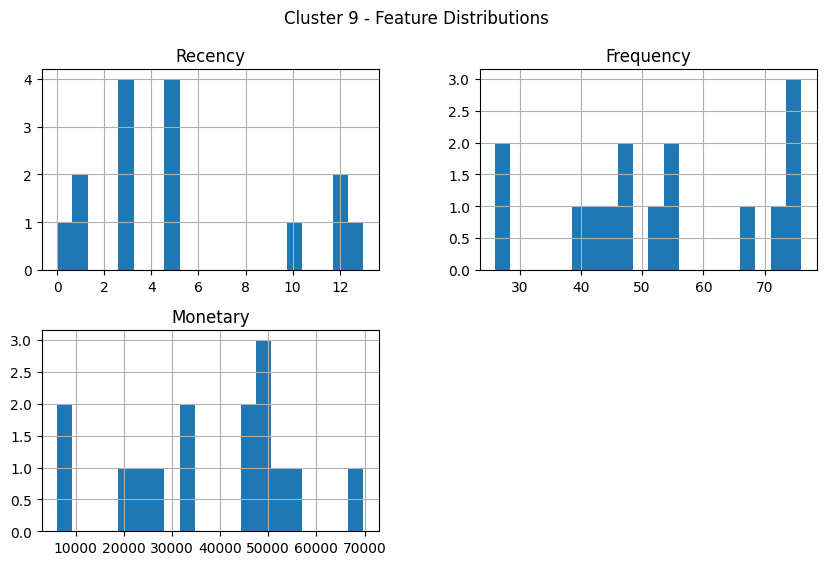

Cluster 7 Report
       PurchaseCount  TotalSpending    FirstPurchaseDate     LastPurchaseDate  \
count       2.000000       2.000000                    2                    2   
mean       57.500000  236003.730000  2010-12-14 01:25:30  2011-10-24 12:10:00   
min        53.000000  229621.870000  2010-12-07 16:42:00  2011-10-21 12:08:00   
25%        55.250000  232812.800000  2010-12-10 21:03:45  2011-10-23 00:09:00   
50%        57.500000  236003.730000  2010-12-14 01:25:30  2011-10-24 12:10:00   
75%        59.750000  239194.660000  2010-12-17 05:47:15  2011-10-26 00:11:00   
max        62.000000  242385.590000  2010-12-20 10:09:00  2011-10-27 12:12:00   
std         6.363961    9025.312965                  NaN                  NaN   

         Recency  Frequency       Monetary  Cluster  HC_Cluster  
count   2.000000   2.000000       2.000000      2.0         2.0  
mean    7.000000  57.500000  236003.730000      7.0         3.0  
min     4.000000  53.000000  229621.870000      7.0    

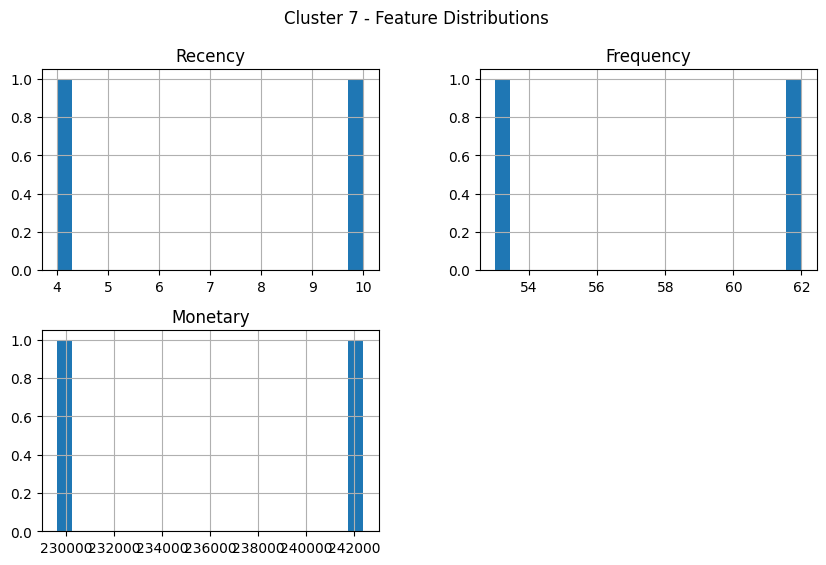

In [15]:
# Detailed report for each cluster
for cluster in customer_df['Cluster'].unique():
    print(f'Cluster {cluster} Report')
    print(customer_df[customer_df['Cluster'] == cluster].describe())
    print("\n")

    # Plotting histograms for each feature in the cluster
    customer_df[customer_df['Cluster'] == cluster][['Recency', 'Frequency', 'Monetary']].hist(bins=20, figsize=(10, 6))
    plt.suptitle(f'Cluster {cluster} - Feature Distributions')
    plt.show()


## Step 10: Advanced Clustering Techniques

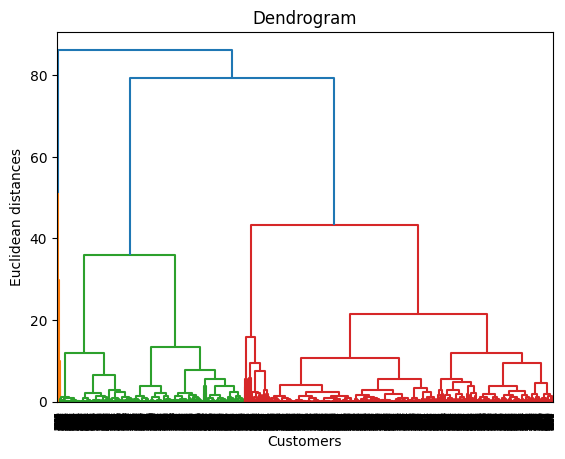

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


  CustomerID  PurchaseCount  TotalSpending   FirstPurchaseDate  \
0    12346.0              2           0.00 2011-01-18 10:01:00   
1    12347.0              6        4085.18 2010-12-07 14:57:00   
2    12348.0              4        1797.24 2010-12-16 19:09:00   
3    12350.0              1         334.40 2011-02-02 16:01:00   
4    12352.0             10        1233.68 2011-02-16 12:33:00   

     LastPurchaseDate  Recency  Frequency  Monetary  Cluster  HC_Cluster  
0 2011-01-18 10:17:00      286          2      0.00        1           5  
1 2011-10-31 12:25:00        0          6   4085.18        8           4  
2 2011-09-25 13:13:00       36          4   1797.24        0           4  
3 2011-02-02 16:01:00      271          1    334.40        1           5  
4 2011-09-28 14:58:00       33         10   1233.68        8           4  


In [16]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Dendrogram for hierarchical clustering
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Apply hierarchical clustering
hc = AgglomerativeClustering(n_clusters=optimal_clusters, affinity='euclidean', linkage='ward')
customer_df['HC_Cluster'] = hc.fit_predict(scaled_features)

# Display the hierarchical clustering result
print(customer_df.head())
